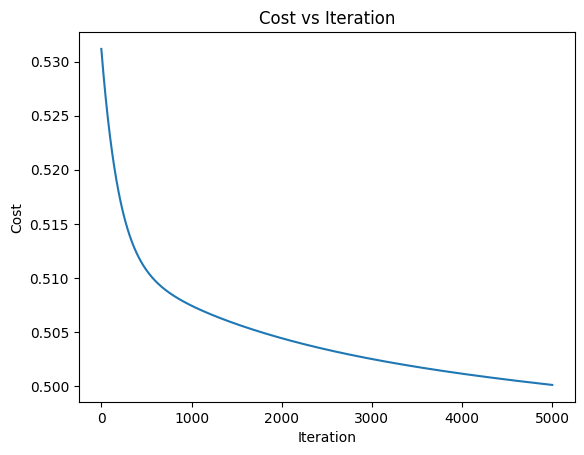

In [22]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 1], [1, 0], [1, 1], [0, 0]])
y = np.array([[1], [1], [0], [0]])

num_input = 2
num_hidden = 5
num_output = 1
Wxh = np.random.randn(num_input, num_hidden)
bh = np.zeros((1, num_hidden))
Why = np.random.randn(num_hidden, num_output)
by = np.zeros((1, num_output))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return np.exp(-z) / ((1 + np.exp(-z)) ** 2)

def forward_prop(X, Wxh, Why, bh, by):
    z1 = np.dot(X, Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1, Why) + by
    y_hat = sigmoid(z2)
    return z1, a1, z2, y_hat

def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y - y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, Why.T) * sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    return dJ_dWxh, dJ_dWhy

def cost_function(y, y_hat):
    J = np.sum((y - y_hat) ** 2) / 2
    return J

alpha = 0.01
num_iterations = 5000
cost = []

for i in range(num_iterations):
    z1, a1, z2, y_hat = forward_prop(X, Wxh, Why, bh, by)
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)

    # update weights
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy

    # compute cost
    c = cost_function(y, y_hat)
    cost.append(c)

plt.plot(cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()
